## 1. Content Type Analysis: Examine the distribution of movies vs. TV shows.

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


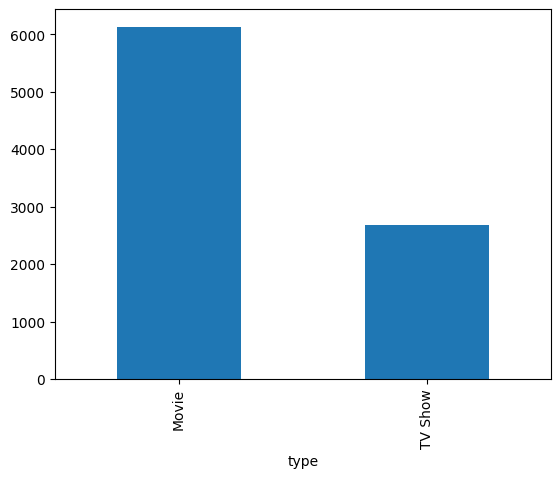

In [6]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv("netflix_dataset.csv")

type_distribution = df['type'].value_counts()
print(type_distribution)

type_distribution.plot(kind='bar')
plt.show()


### Patterns:
- There are significantly more movies (6131) than TV shows (2676) available in this dataset.
- The number of movies is more than double the number of TV shows, suggesting that Netflix has a stronger focus on movies in their catalog.

### Insights:
- This could indicate a content strategy that prioritizes movies, possibly due to higher demand or better viewer retention.
- It's also possible that the production and acquisition costs, along with licensing agreements, might be more favorable for movies compared to TV shows.

In [7]:
print(type_distribution)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Analyze trends over time in the type of content being added to Netflix

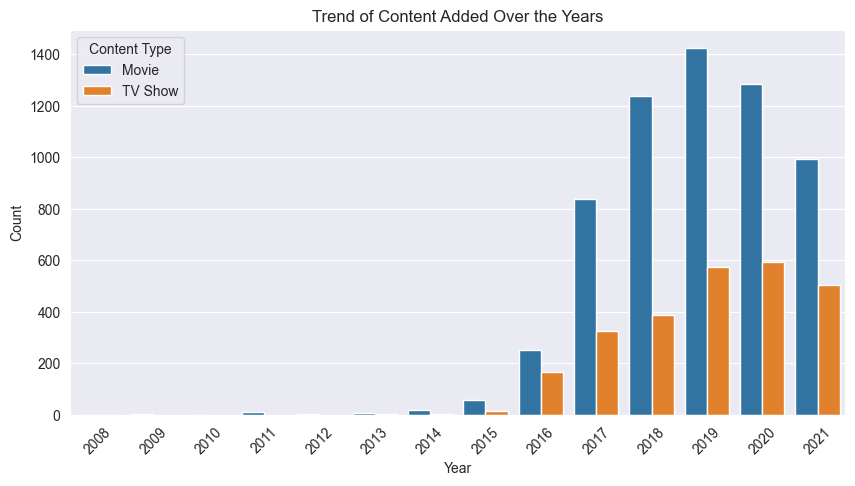

Movie Counts by Year:
year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
dtype: int64
TV Shows Counts by Year:
year_added
2008      1
2013      4
2014      4
2015     17
2016    165
2017    325
2018    388
2019    575
2020    594
2021    505
dtype: int64


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Drop rows with missing date_added values
netflix_df = netflix_df.dropna(subset=['date_added'])

# Convert date_added column to datetime with custom format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

# Drop rows where conversion fails
netflix_df = netflix_df.dropna(subset=['date_added'])

# Extract year from date_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Plot the trend of content added over the years
plt.figure(figsize=(10, 5))
sns.countplot(x='year_added', hue='type', data=netflix_df)
plt.title('Trend of Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

# Check for duplicates
duplicate_rows = netflix_df[netflix_df.duplicated()]
#print("Duplicate Rows:")
#print(duplicate_rows)

movie_counts = netflix_df[netflix_df['type'] == 'Movie'].groupby('year_added').size()
tv_show_counts = netflix_df[netflix_df['type'] == 'TV Show'].groupby('year_added').size()

print("Movie Counts by Year:")
print(movie_counts)

print("TV Shows Counts by Year:")
print(tv_show_counts)

total_actual_movies = netflix_df['type'].value_counts()['Movie']
total_actual_tvshows = netflix_df['type'].value_counts()['TV Show']
#print("Total Movies:", total_actual_movies)
#print("Total TV Shows:", total_actual_tvshows)

### Patterns:
- There are significantly more movies than TV shows trending every year after 2008 according to the dataset.
- In 2019 the number of movies trending was maximized ( 1424).
- In 2020 the number of TV shows trending was maximized ( 594).
- The trending number of movies was growing till 2019 and then began to fall hitting 993 in 2021
- The trending number of TV shows was growing till 2020 and then began falling hitting 505 in 2021

### Insights:
- This could indicate that people prefer movies to TV shows making them more trendy each year

## 2. Release Year Analysis. Investigate the distribution of content by release year.

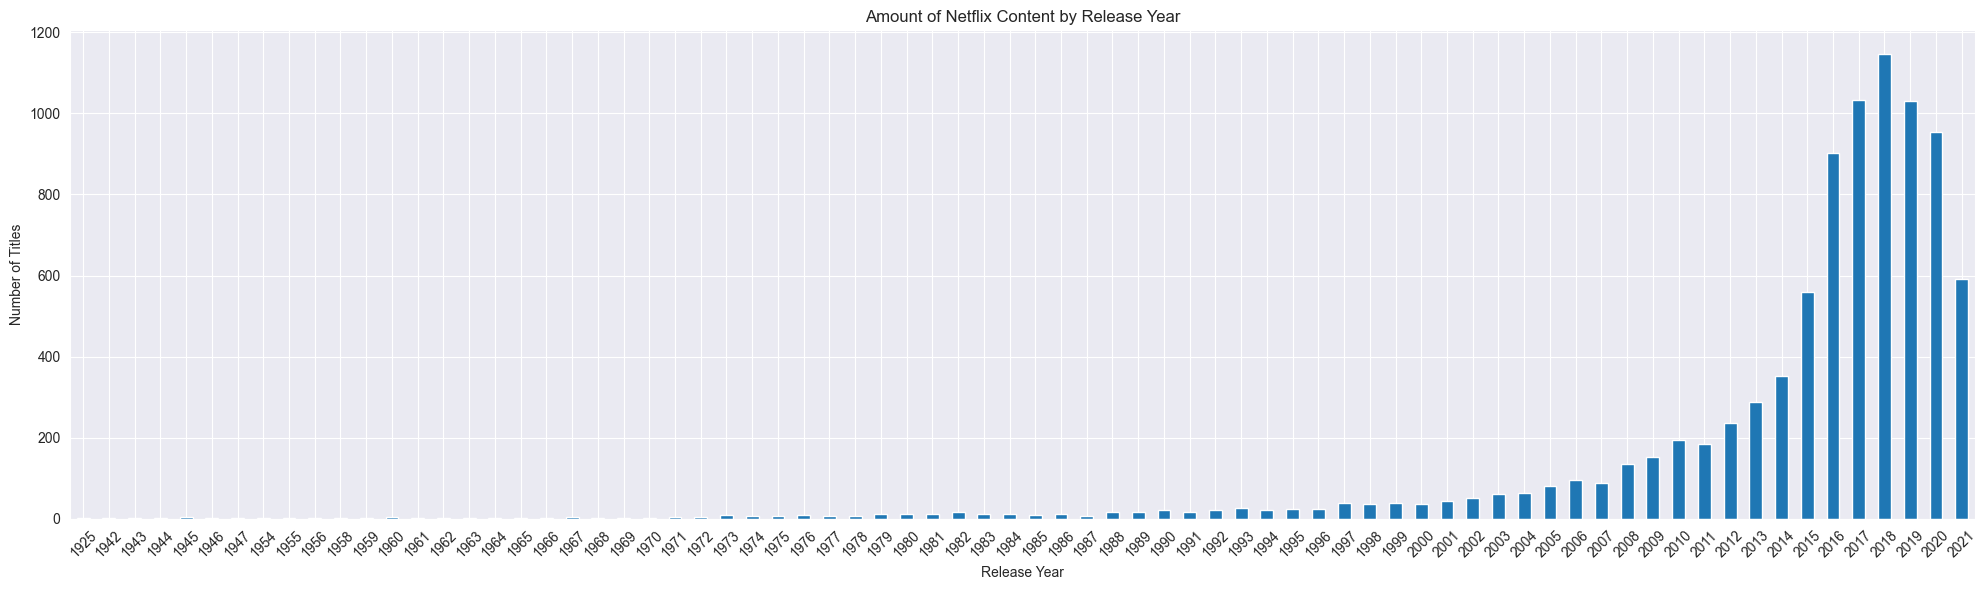

Distribution of Netflix Content by Release Year:
release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Plot distribution of content by release year
plt.figure(figsize=(20, 6))
netflix_data['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Amount of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
content_distribution = netflix_data['release_year'].value_counts().sort_index()
print("Distribution of Netflix Content by Release Year:")
print(content_distribution)

Total number of movies: 6131
Total number of TV shows: 2676

Distribution of movies among years:
release_year
1925      0
1942      2
1943      3
1944      3
1945      3
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, Length: 74, dtype: int64

Distribution of TV shows among years:
release_year
1925      1
1942      0
1943      0
1944      0
1945      1
       ... 
2017    265
2018    380
2019    397
2020    436
2021    315
Name: count, Length: 74, dtype: int64


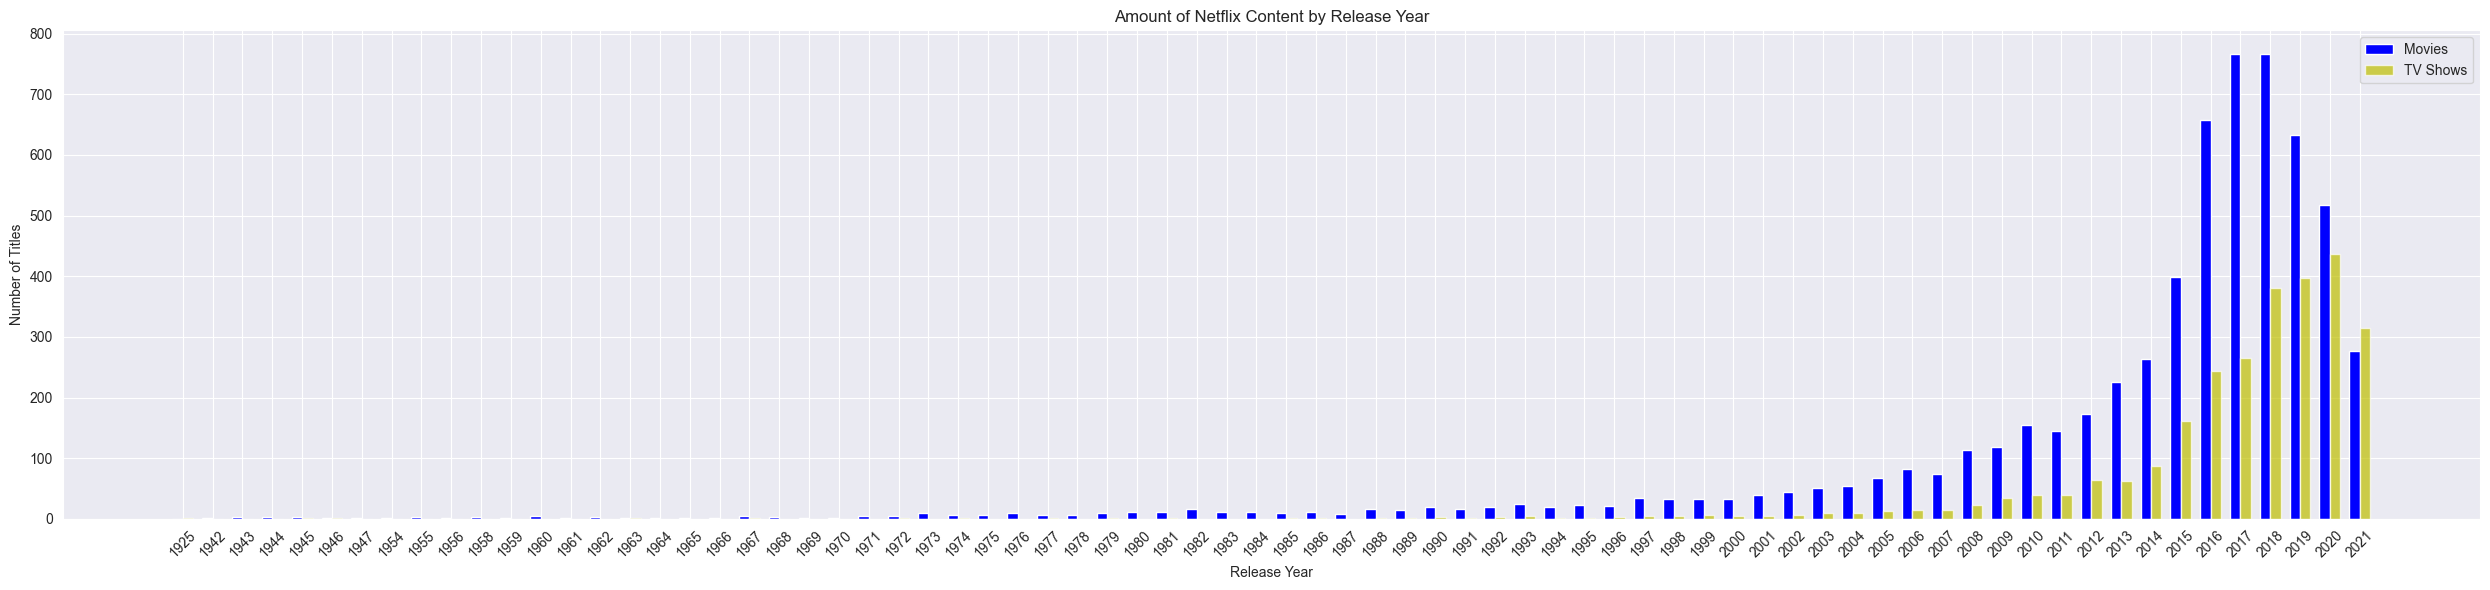

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filtering movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Grouping by release year for movies and TV shows
movies_by_year = movies['release_year'].value_counts().sort_index()
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()

# Aligning years for TV shows
merged_index = movies_by_year.index.union(tv_shows_by_year.index)
movies_by_year = movies_by_year.reindex(merged_index, fill_value=0)
tv_shows_by_year = tv_shows_by_year.reindex(merged_index, fill_value=0)

# Determining the width of the bars
bar_width = 0.35

# Creating numerical indices for years
years = np.arange(len(merged_index))

# Print key details
print("Total number of movies:", movies.shape[0])
print("Total number of TV shows:", tv_shows.shape[0])
print()

# Print distribution of movies and TV shows among years
print("Distribution of movies among years:")
print(movies_by_year)
print()

print("Distribution of TV shows among years:")
print(tv_shows_by_year)
print()

# Creating the plot
plt.figure(figsize=(25, 6))

# Adding bars for movies
plt.bar(years - bar_width/2, movies_by_year, bar_width, color='b', label='Movies')

# Adding bars for TV shows
plt.bar(years + bar_width/2, tv_shows_by_year, bar_width, color='y', label='TV Shows', alpha=0.7)

plt.title('Amount of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(years, merged_index)  # Setting x-axis labels for years
plt.xticks(rotation=45)
plt.legend()  # Adding legend
plt.tight_layout()
plt.show()

### Patterns:
- The content was being released in relatively constantly growing amounts with years passing. But there are some overall falls in 2008, 2012 and 2019-2021 
- The distribution of movie releases was growing up to 2019 hitting pick in 2017-2018 with 767 and then beginning to fall down to 277 in 2021
- The distribution of TV Shows releases was growing up to 2021 hitting pick in 2020 with 436 releases and then falling to 315
- There have always been more movies released except for 2021 when the distribution looked like this: Movies reached only 277 and TV Shows hit 315 in releases

### Insights:
- Looking at the diagram it is possible to assume that the demand and financing was growing through the years resulting in higher overall release numbers
- Remembering the Covid times of 2020 it is logical to say that the fall in content-release of 2020 and 2021 was due to those events
- The higher release numbers of TV Shows than movies in 2021 and the falling difference between the two in earlier years lets us assume that the demand for TV Shows started overgrowing the demand for movies

## Identify trends in the production of new content over the years

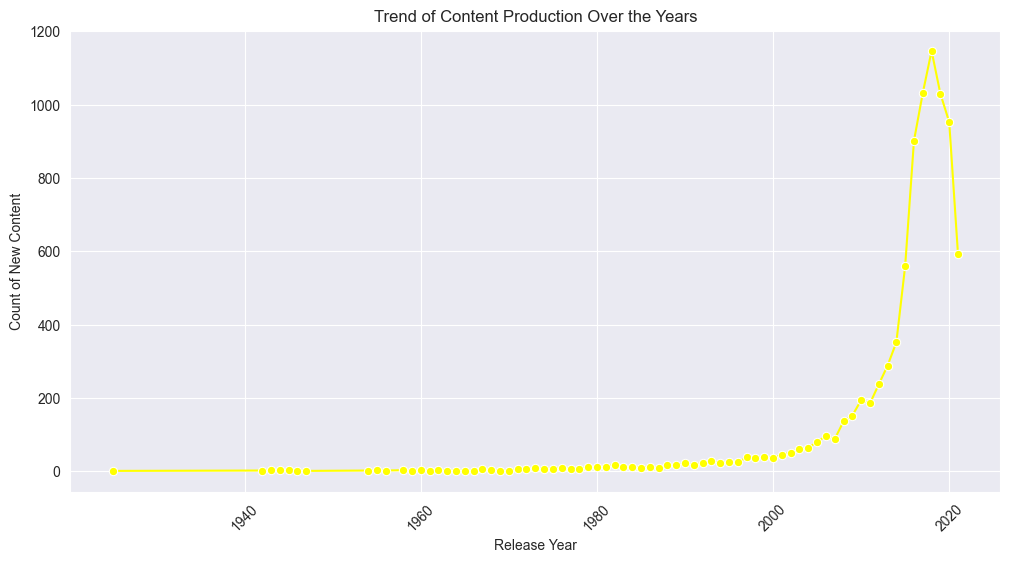

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_dataset.csv")
# Group the dataset by release year and count the number of content releases for each year
content_by_year = netflix_df.groupby('release_year').size().reset_index(name='count')

# Plot the trend of content production over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=content_by_year, marker='o', color='yellow')
plt.title('Trend of Content Production Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count of New Content')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

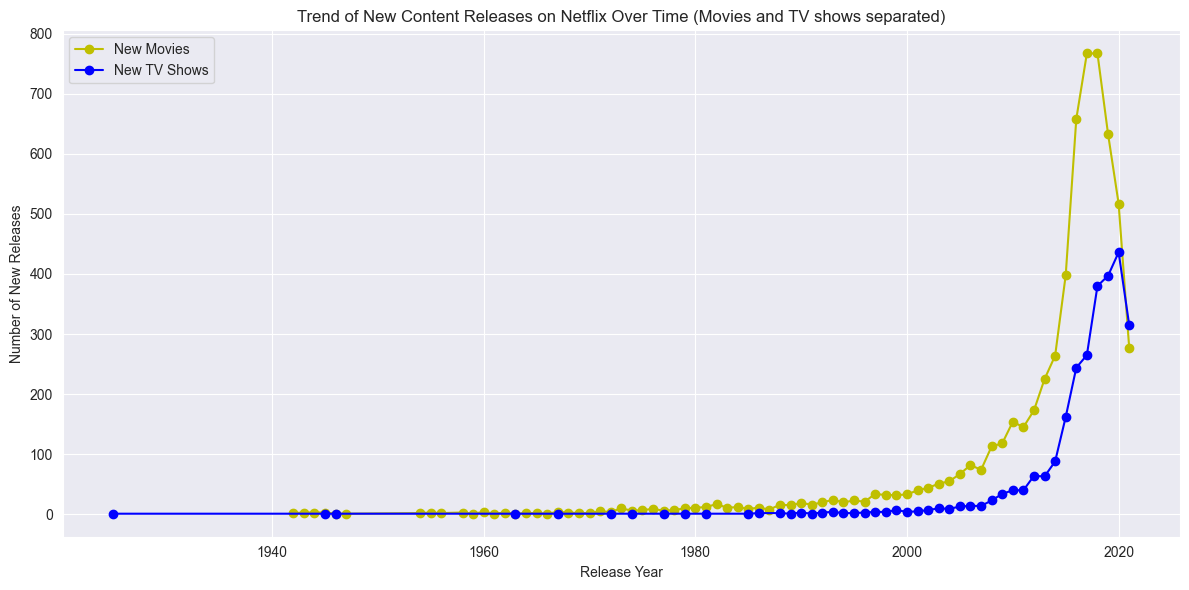

Total number of movies: 6131
Total number of TV shows: 2676

Distribution of movies among years:
release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Length: 73, dtype: int64

Distribution of TV shows among years:
release_year
1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filter movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Calculate number of new movie releases each year
new_movies_by_year = movies.groupby('release_year').size()

# Calculate number of new TV show releases each year
new_tv_shows_by_year = tv_shows.groupby('release_year').size()

# Plot trend of new content releases over time
plt.figure(figsize=(12, 6))

new_movies_by_year.plot(kind='line', marker='o', color='y', label='New Movies')
new_tv_shows_by_year.plot(kind='line', marker='o', color='b', label='New TV Shows')

plt.title('Trend of New Content Releases on Netflix Over Time (Movies and TV shows separated)')
plt.xlabel('Release Year')
plt.ylabel('Number of New Releases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate total number of movies and TV shows
total_movies = movies.shape[0]
total_tv_shows = tv_shows.shape[0]

# Print key details
print("Total number of movies:", total_movies)
print("Total number of TV shows:", total_tv_shows)
print()

# Print distribution of movies and TV shows among years
print("Distribution of movies among years:")
print(new_movies_by_year)
print()

print("Distribution of TV shows among years:")
print(new_tv_shows_by_year)
print()

### Patterns:
- The production of movies and TV shows was growing almost constantly up to 2019 for TV shows and 2020 for movies
- Movies show themselves to be produced more than the TV shows in the later years and up to 2021

### Insights:
- The early years data is very hard to analyze due to its incompletion and really low numbers. But talking about newer data it is easy to say that production was growing of both movies and TV shows with the difference becoming less and less and finally resulting in TV shows having higher production, and make an assumption that the demand for TV shows was constantly growing relatively to the demand for movies


## Ratings Analysis: Explore the distribution of content by ratings (e.g., G, PG, PG-13, R, etc.).

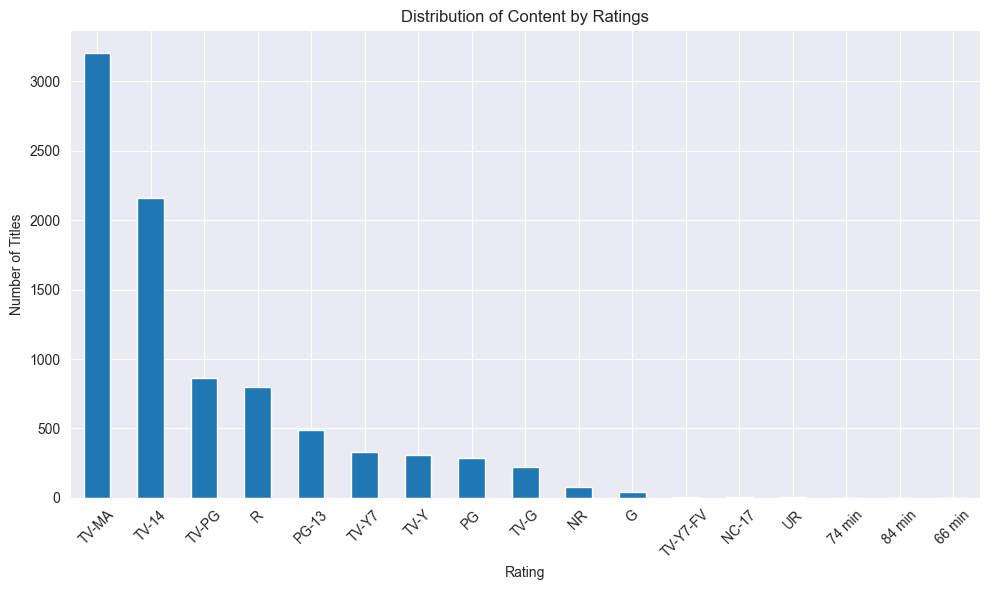

Distribution of content by ratings:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# 1. Explore the distribution of content by ratings
ratings_distribution = netflix_data['rating'].value_counts()

# Plotting the distribution of content by ratings
plt.figure(figsize=(10, 6))
ratings_distribution.plot(kind='bar')
plt.title('Distribution of Content by Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the ratings distribution
print("Distribution of content by ratings:")
print(ratings_distribution)


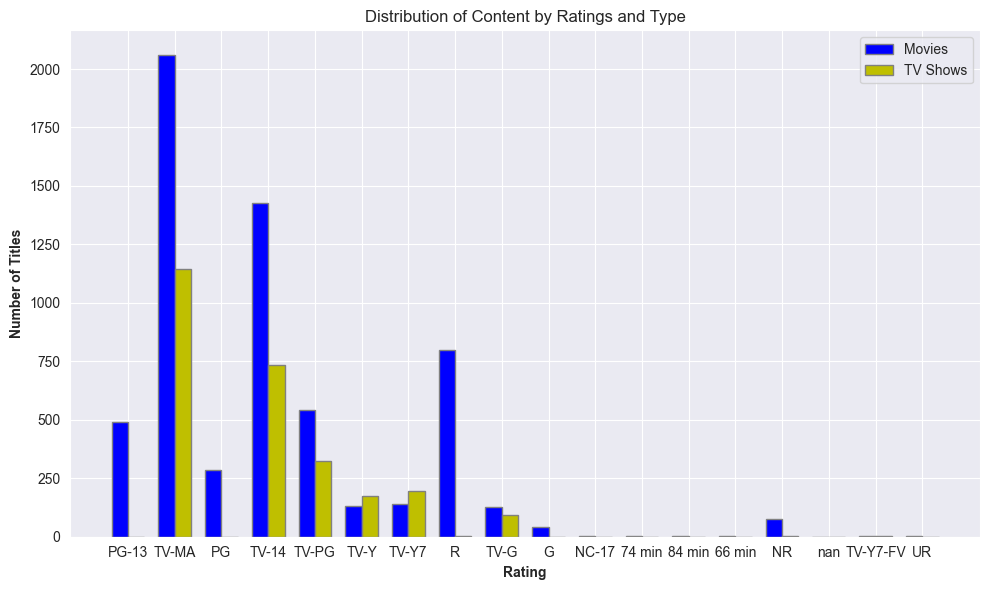

Distribution of movies by ratings:
PG-13: 490
TV-MA: 2062
PG: 287
TV-14: 1427
TV-PG: 540
TV-Y: 131
TV-Y7: 139
R: 797
TV-G: 126
G: 41
NC-17: 3
74 min: 1
84 min: 1
66 min: 1
NR: 75
nan: 0
TV-Y7-FV: 5
UR: 3

Distribution of TV shows by ratings:
PG-13: 0
TV-MA: 1145
PG: 0
TV-14: 733
TV-PG: 323
TV-Y: 176
TV-Y7: 195
R: 2
TV-G: 94
G: 0
NC-17: 0
74 min: 0
84 min: 0
66 min: 0
NR: 5
nan: 0
TV-Y7-FV: 1
UR: 0


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filter movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Get unique rating categories
rating_categories = netflix_data['rating'].unique()

# Initialize lists to store counts for movies and TV shows by rating category
movies_counts = []
tv_shows_counts = []

# Iterate over each rating category
for rating in rating_categories:
    # Count movies and TV shows for each rating category
    movies_counts.append(movies[movies['rating'] == rating].shape[0])
    tv_shows_counts.append(tv_shows[tv_shows['rating'] == rating].shape[0])

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(rating_categories))
r2 = [x + bar_width for x in r1]

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, movies_counts, color='b', width=bar_width, edgecolor='grey', label='Movies')
plt.bar(r2, tv_shows_counts, color='y', width=bar_width, edgecolor='grey', label='TV Shows')

# Add labels and title
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Number of Titles', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(rating_categories))], rating_categories)
plt.title('Distribution of Content by Ratings and Type')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Print distribution of movies and TV shows by ratings
print("Distribution of movies by ratings:")
for rating, count in zip(rating_categories, movies_counts):
    print(f"{rating}: {count}")

print("\nDistribution of TV shows by ratings:")
for rating, count in zip(rating_categories, tv_shows_counts):
    print(f"{rating}: {count}")

### Patterns:
- TV-MA rating has the most content (3207). 74, 84 and 66 min ratings have the least content.
- There are no TV shows with PG-13, PG, G, NC-17, UR, 74, 84 and 66 min ratings unlike movies.
- None of the content has nan rating
- Most movies and most TV shows both have higher distributions at TV-MA, TV-14 ratings

### Insights:
-

## Examine any correlation between ratings and the popularity or viewership of content.

## Duration Analysis: Calculate the average duration of movies.

In [20]:
import pandas as pd

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Filter the dataset to include only movies
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()  # Make a copy to avoid modifying the original DataFrame

# Convert the duration column to numeric format
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Calculate the average duration of movies
average_duration = movies_df['duration'].mean()

print(f"Average duration of movies: {average_duration:.2f} minutes")

Average duration of movies: 99.58 minutes


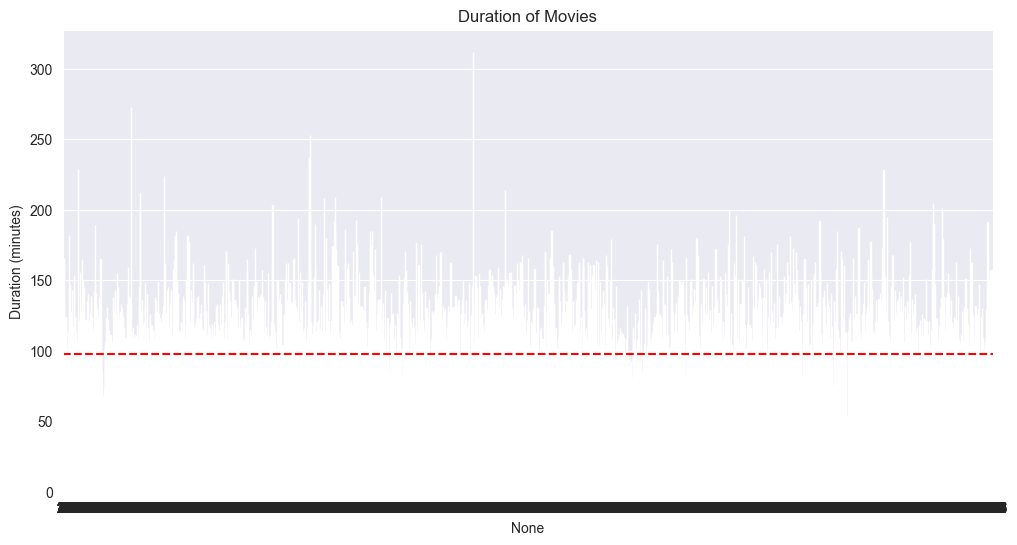

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Filter the dataset to include only movies
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()  # Make a copy to avoid modifying the original DataFrame

# Convert the duration column to numeric format
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(float)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_df.index, y='duration', data=movies_df, color='yellow')

# Add a line for the median duration
median_duration = movies_df['duration'].median()
plt.axhline(y=median_duration, color='red', linestyle='--', label=f'Median Duration: {median_duration:.2f} min')

# Customize the plot
plt.title('Duration of Movies')
#plt.xlabel('Movie Index')
plt.ylabel('Duration (minutes)')

plt.show()

### Patterns:
- The average duration of movies equals to 99.58 minutes

### Insights:
- With all movies having different duration, 99.58 minutes is the average for all movies in the dataset provided for analysis

## Analyze the distribution of TV shows by the number of seasons

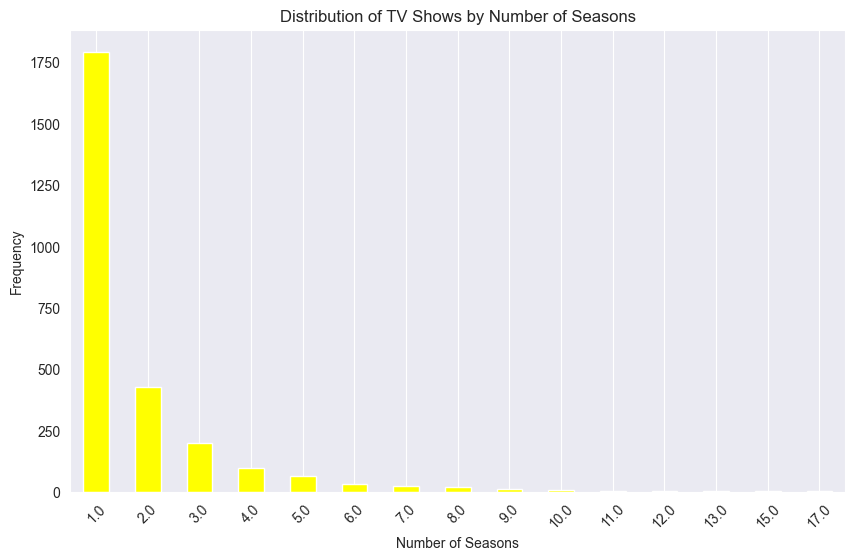

Frequency of TV Shows by Number of Seasons:
num_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
11.0       2
12.0       2
13.0       3
15.0       2
17.0       1
Name: count, dtype: int64


In [25]:
netflix_df = pd.read_csv("netflix_dataset.csv")

# Filter the dataset to include only TV shows
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()  # Make a copy to avoid modifying the original DataFrame

# Extract the number of seasons from the 'duration' column
tv_shows_df.loc[:, 'num_seasons'] = tv_shows_df['duration'].str.split().str[0].astype(float)

# Calculate the frequency of TV shows for each number of seasons
seasons_distribution = tv_shows_df['num_seasons'].value_counts().sort_index()

# Visualize the distribution
plt.figure(figsize=(10, 6))
seasons_distribution.plot(kind='bar', color='yellow')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Print the frequency of TV shows for each number of seasons
print("Frequency of TV Shows by Number of Seasons:")
print(seasons_distribution)



### Patterns:
- 

### Insights:
- 

## Country-wise Content Analysis: Assess the volume of content produced by different countries.

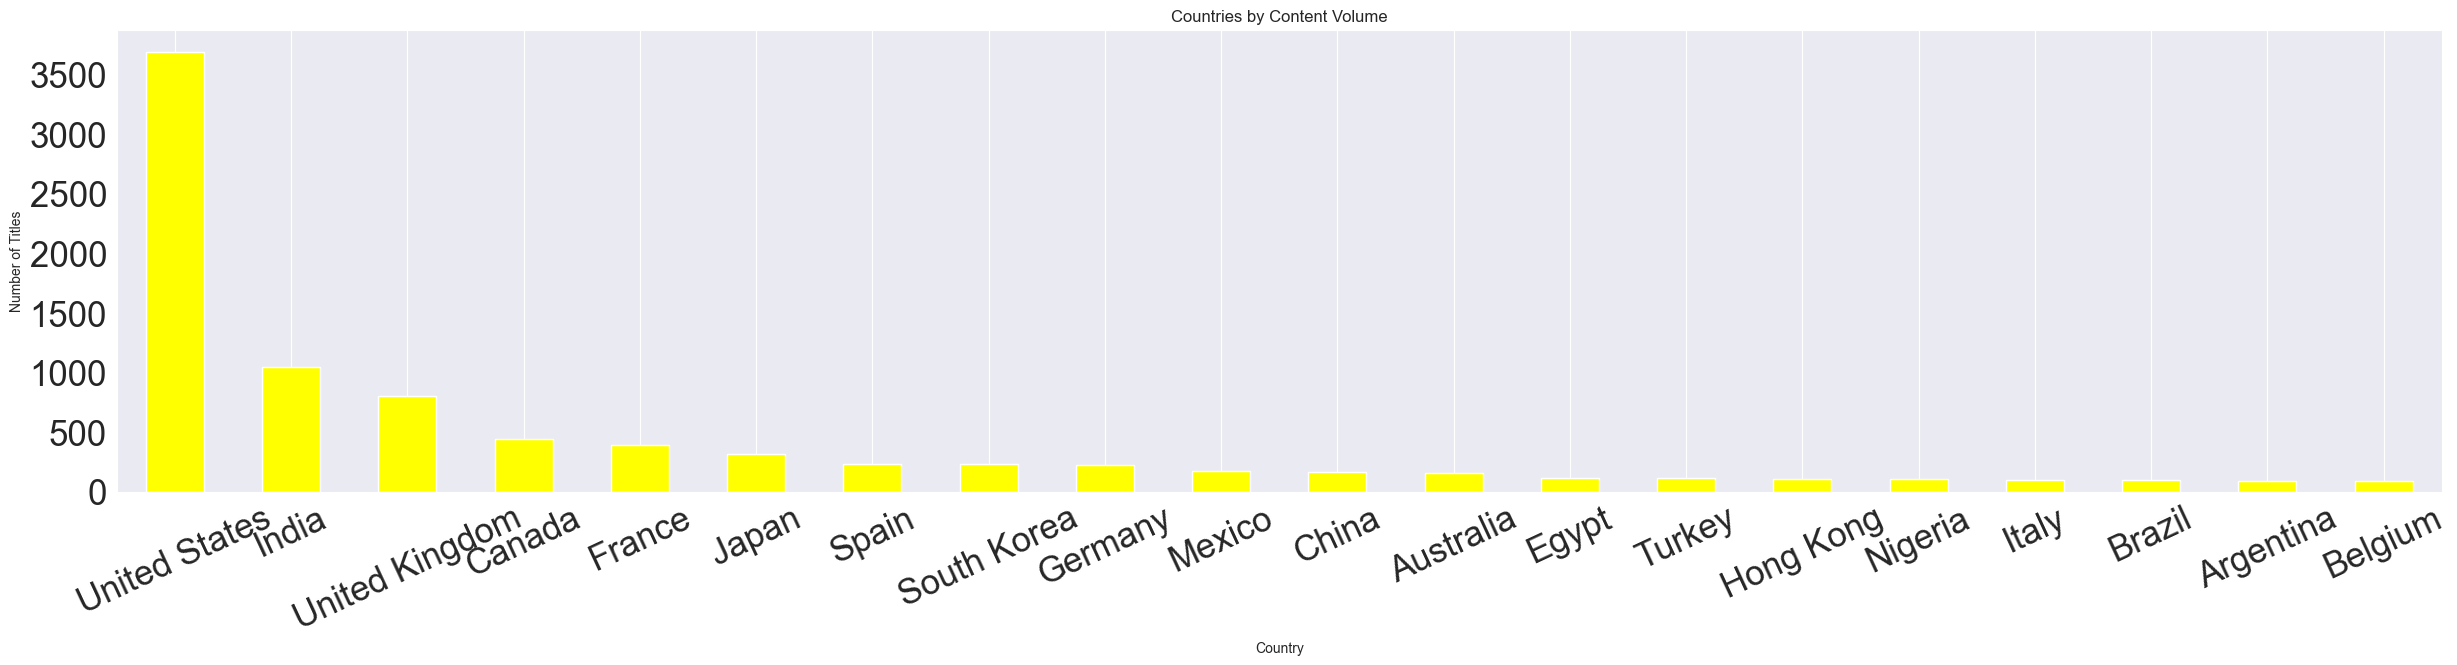

Top 20 Countries by Content Volume:
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Belgium             90
Name: count, dtype: int64


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

number_of_countries = 20

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Split the 'country' column by ',' and create a list of countries for each row
netflix_df['country_list'] = netflix_df['country'].str.split(', ')

# Create a list of all countries
all_countries = [country for sublist in netflix_df['country_list'].dropna() for country in sublist]

# Count the occurrences of each country
country_counts = pd.Series(all_countries).value_counts()

# Visualize the distribution of content by country
plt.figure(figsize=(30, 6))
country_counts[:number_of_countries].plot(kind='bar', color='yellow')
plt.title('Countries by Content Volume')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.yticks(fontsize=25)
plt.xticks(rotation=25, fontsize=25)  # Set font size for x-axis labels
plt.grid(axis='y')
plt.show()

print("Top", number_of_countries, "Countries by Content Volume:")
print(country_counts[:number_of_countries])

### Patterns:
- 

### Insights:
- 

## Director and Cast Analysis: Identify directors or cast members with the most titles on Netflix.

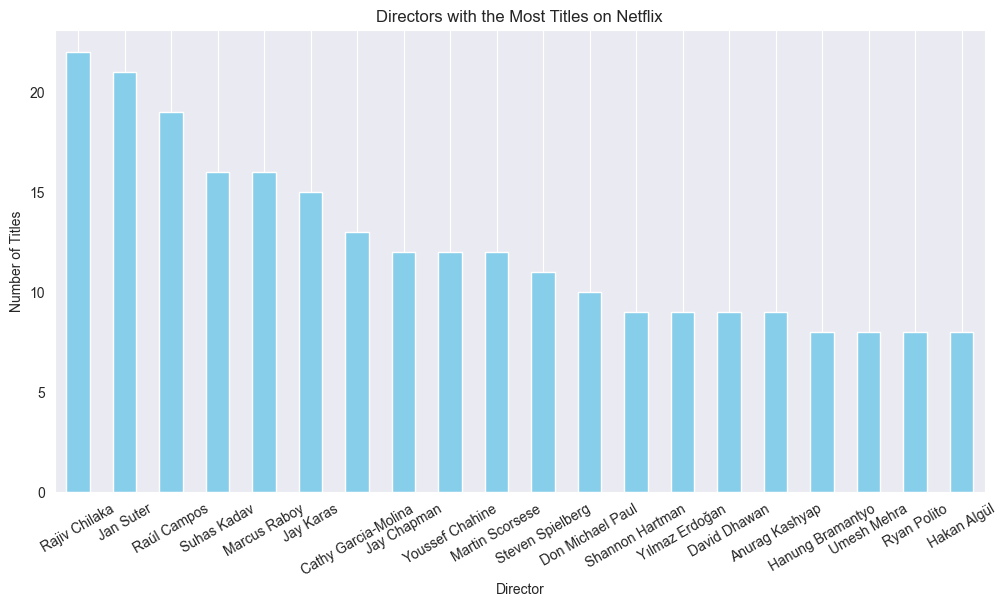

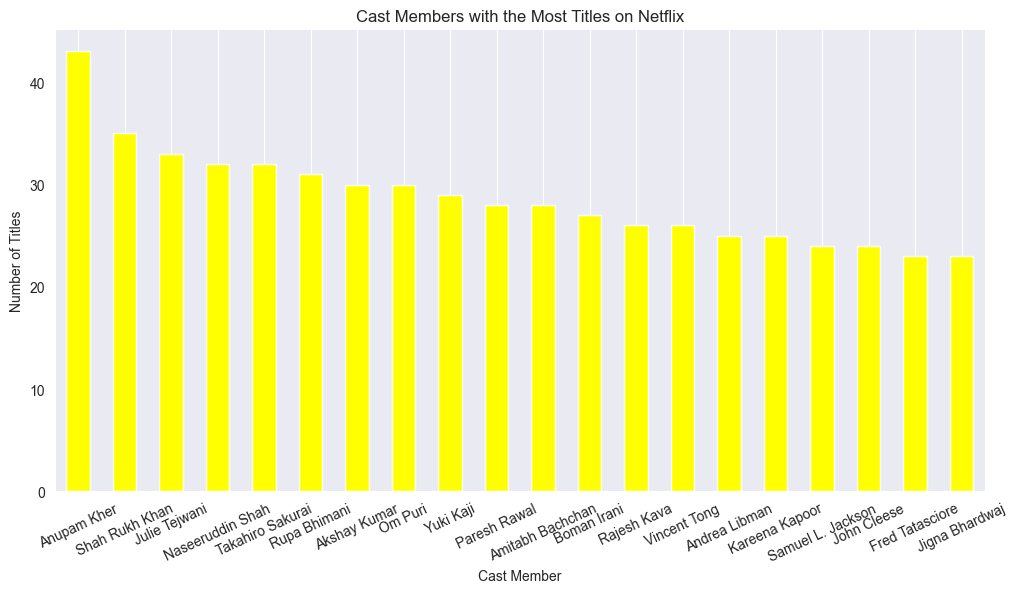

Top 20 Directors with the Most Titles on Netflix:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       11
Don Michael Paul       10
Shannon Hartman         9
Yılmaz Erdoğan          9
David Dhawan            9
Anurag Kashyap          9
Hanung Bramantyo        8
Umesh Mehra             8
Ryan Polito             8
Hakan Algül             8
Name: count, dtype: int64

Top 20 Cast Members with the Most Titles on Netflix:
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

num_of_directors = 20
num_of_actors = 20

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Split the 'director' column by ',' and create a list of directors for each row
netflix_df['director_list'] = netflix_df['director'].str.split(', ')
# Split the 'cast' column by ',' and create a list of cast members for each row
netflix_df['cast_list'] = netflix_df['cast'].str.split(', ')

# Create a list of all directors and cast members
all_directors = [director for sublist in netflix_df['director_list'].dropna() for director in sublist]
all_cast = [cast for sublist in netflix_df['cast_list'].dropna() for cast in sublist]

# Count the occurrences of each director and cast member
director_counts = pd.Series(all_directors).value_counts()
cast_counts = pd.Series(all_cast).value_counts()

# Visualize the top directors with the most titles
plt.figure(figsize=(12, 6))
director_counts[:num_of_directors].plot(kind='bar', color='skyblue')
plt.title('Directors with the Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

# Visualize the top cast members with the most titles
plt.figure(figsize=(12, 6))
cast_counts[:num_of_actors].plot(kind='bar', color='yellow')
plt.title('Cast Members with the Most Titles on Netflix')
plt.xlabel('Cast Member')
plt.ylabel('Number of Titles')
plt.xticks(rotation=25)
plt.grid(axis='y')
plt.show()

print("Top", num_of_directors, "Directors with the Most Titles on Netflix:")
print(director_counts.head(num_of_directors))

print("\nTop", num_of_actors, "Cast Members with the Most Titles on Netflix:")
print(cast_counts.head(num_of_actors))


### Patterns:
- 

### Insights:
- 

## Map collaboration networks among actors and directors(actors -> directors).

### Patterns:
- 

### Insights:
- 

## Genre Analysis: Determine the most popular genres on Netflix.

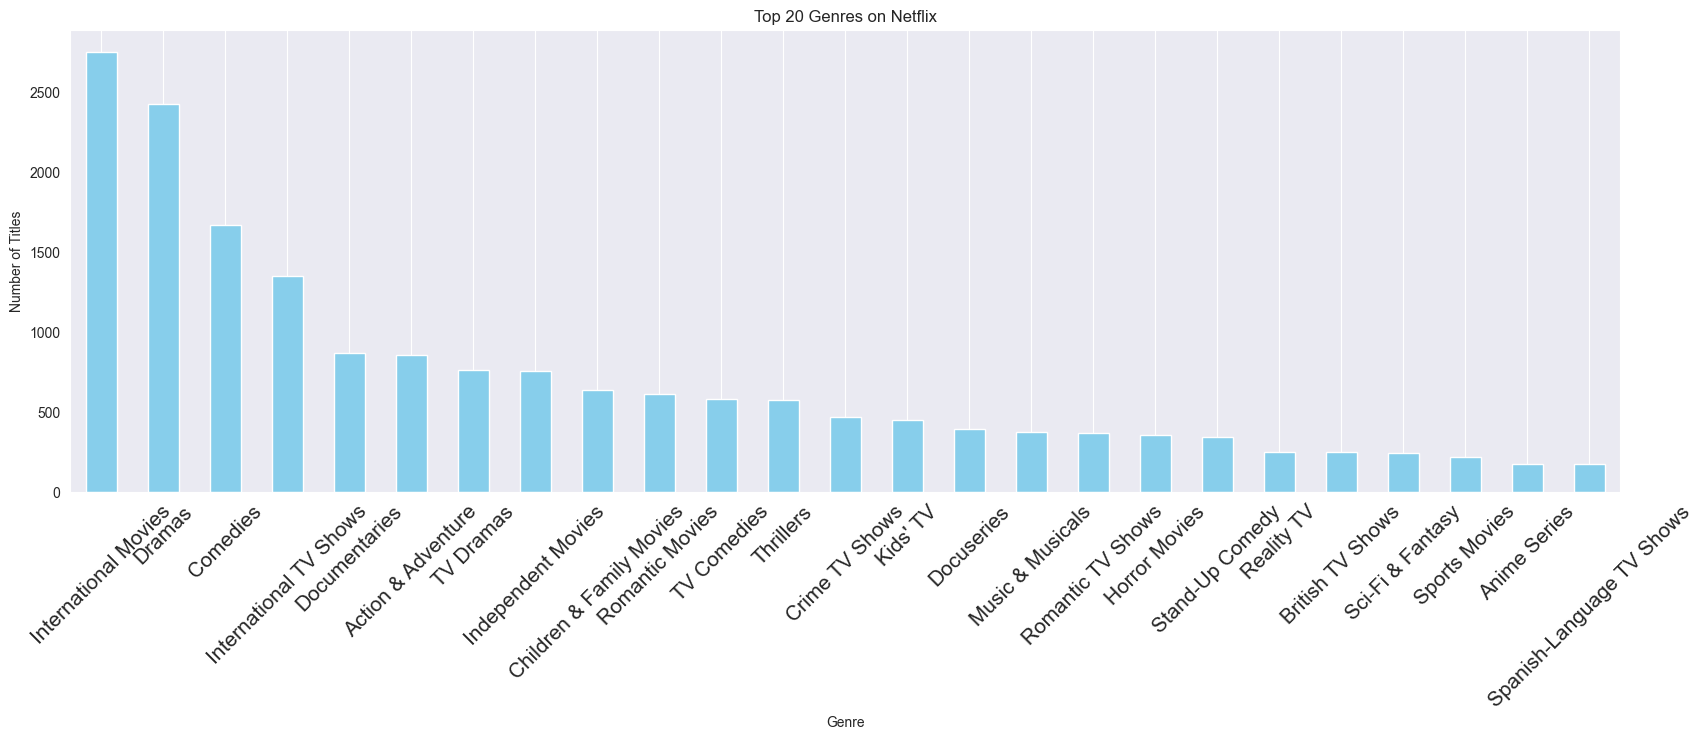

Number of titles for each genre:
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korea

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Split the 'listed_in' column by ',' and create a list of genres for each row
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in netflix_df['genre_list'].dropna() for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Visualize the distribution of genres
plt.figure(figsize=(20, 6))
genre_counts[:25].plot(kind='bar', color='skyblue')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, fontsize = 15)
plt.grid(axis='y')
plt.show()

print("Number of titles for each genre:")
print(genre_counts)


### Patterns:
- 

### Insights:
- 

## Investigate trends in genre popularity over time.

Genre: Documentaries, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: TV Dramas, Release Year: 2021.0, Number of Titles: 1
Genre: TV Mysteries, Release Year: 2021.0, Number of Titles: 1
Genre: Crime TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 2
Genre: TV Action & Adventure, Release Year: 2021.0, Number of Titles: 1
Genre: Docuseries, Release Year: 2021.0, Number of Titles: 1
Genre: Reality TV, Release Year: 2021.0, Number of Titles: 1
Genre: International TV Shows, Release Year: 2021.0, Number of Titles: 3
Genre: Romantic TV Shows, Release Year: 2021.0, Number of Titles: 1
Genre: TV Comedies, Release Year: 2021.0, Number of Titles: 1
Genre: TV Dramas, Release Year: 2021.0, Number of Titles: 2
Genre: TV Horror, Release Year: 2021.0, Number of Titles: 1
Genre: TV Mysteries, Release Year: 2021.0, Number of Titles: 2
Genre: Children & Fami

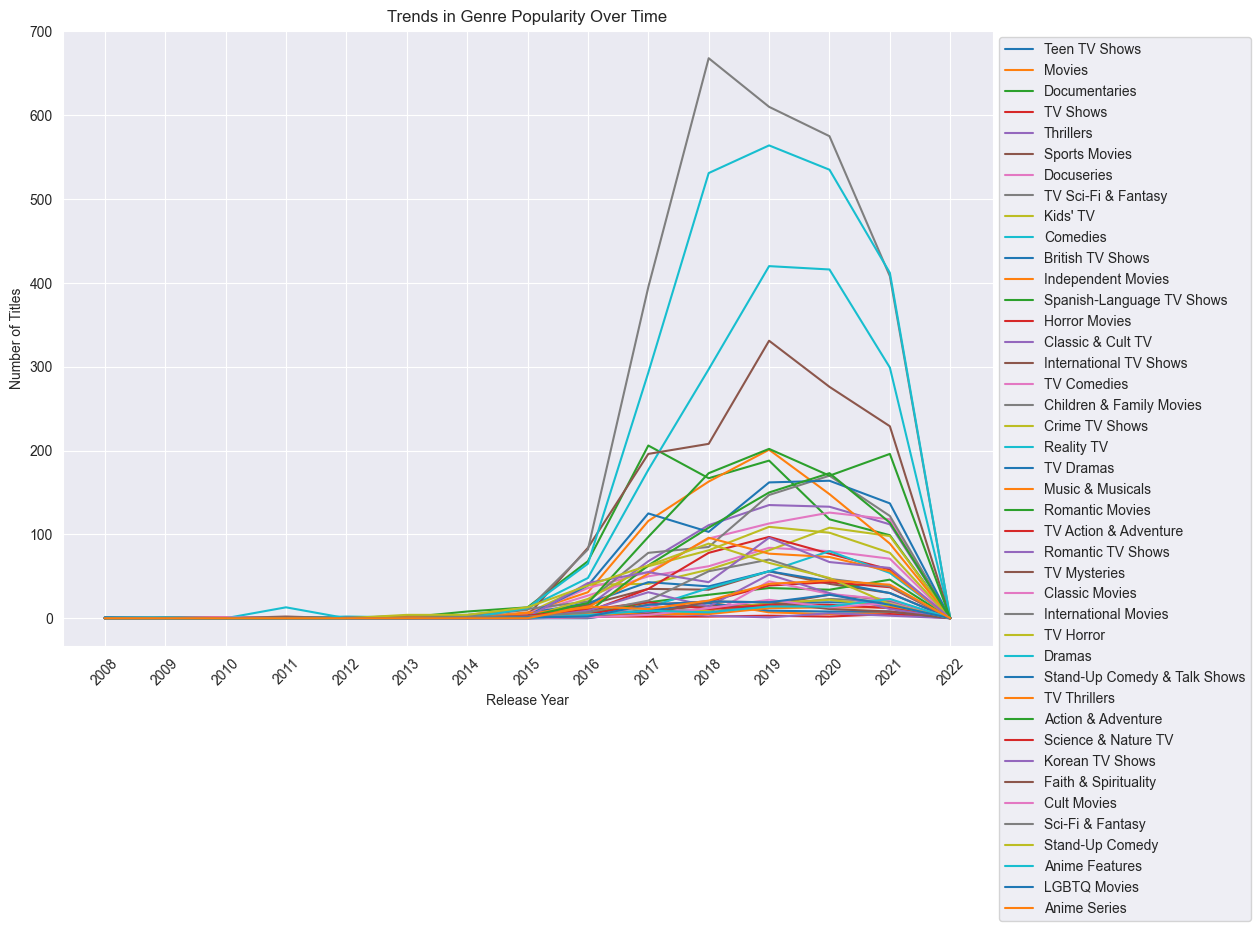

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Specify the format string to handle the date format inconsistency
netflix_df['release_year'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce').dt.year

# Split the 'listed_in' column by ',' and create a list of genres for each row
netflix_df['genre_list'] = netflix_df['listed_in'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in netflix_df['genre_list'].dropna() for genre in sublist]

# Get unique genres
unique_genres = list(set(all_genres))

# Create a DataFrame to store genre counts for each release year
genre_counts_by_year = pd.DataFrame(index=unique_genres, columns=range(2008, 2023)).fillna(0)

# Count the occurrences of each genre for each release year
for index, row in netflix_df.iterrows():
    if not pd.isna(row['release_year']):  # Check for NaN values in 'release_year'
        for genre in row['genre_list']:
            genre_counts_by_year.loc[genre, row['release_year']] += 1
            print(f"Genre: {genre}, Release Year: {row['release_year']}, Number of Titles: {genre_counts_by_year.loc[genre, row['release_year']]}")

# Plot the trends in genre popularity over time
plt.figure(figsize=(12, 8))
for genre in genre_counts_by_year.index:
    plt.plot(genre_counts_by_year.loc[genre], label=genre)
plt.title('Trends in Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(range(2008, 2023), rotation=45)
plt.show()

### Patterns:
- 

### Insights:
- 